AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  D 		  R
-------------------------------------
| 3.8 		 0.78 		 0.23 |
| 6.5 		 0.89 		 0.76 |
| 5.4 		 0.17 		 0.32 |
| 6.2 		 0.62 		 0.25 |
| 3.5 		 0.45 		 0.93 |
| 7.9 		 0.1 		 0.13 |
| 6.8 		 0.48 		 0.34 |
| 1.4 		 0.55 		 0.25 |
| 0.3 		 0.3 		 0.66 |
| 7.3 		 0.37 		 0.4 |
| 8.1 		 0.94 		 0.06 |
| 5.4 		 0.12 		 0.82 |
| 2.5 		 0.81 		 0.29 |
| 4.0 		 0.79 		 0.08 |
| 8.2 		 0.75 		 0.02 |
| 3.7 		 0.79 		 0.99 |
| 5.5 		 0.03 		 0.83 |
| 3.2 		 0.23 		 0.21 |
| 2.3 		 0.94 		 0.77 |
-------------------------------------
The s.d. of M is: 2.47
The s.d. of D is: 0.29
The s.d. of R is: 0.26
-------------------------------------
The mean of M is: 4.89
The mean of D is: 0.48
The mean of R is: 0.53
-------------------------------------


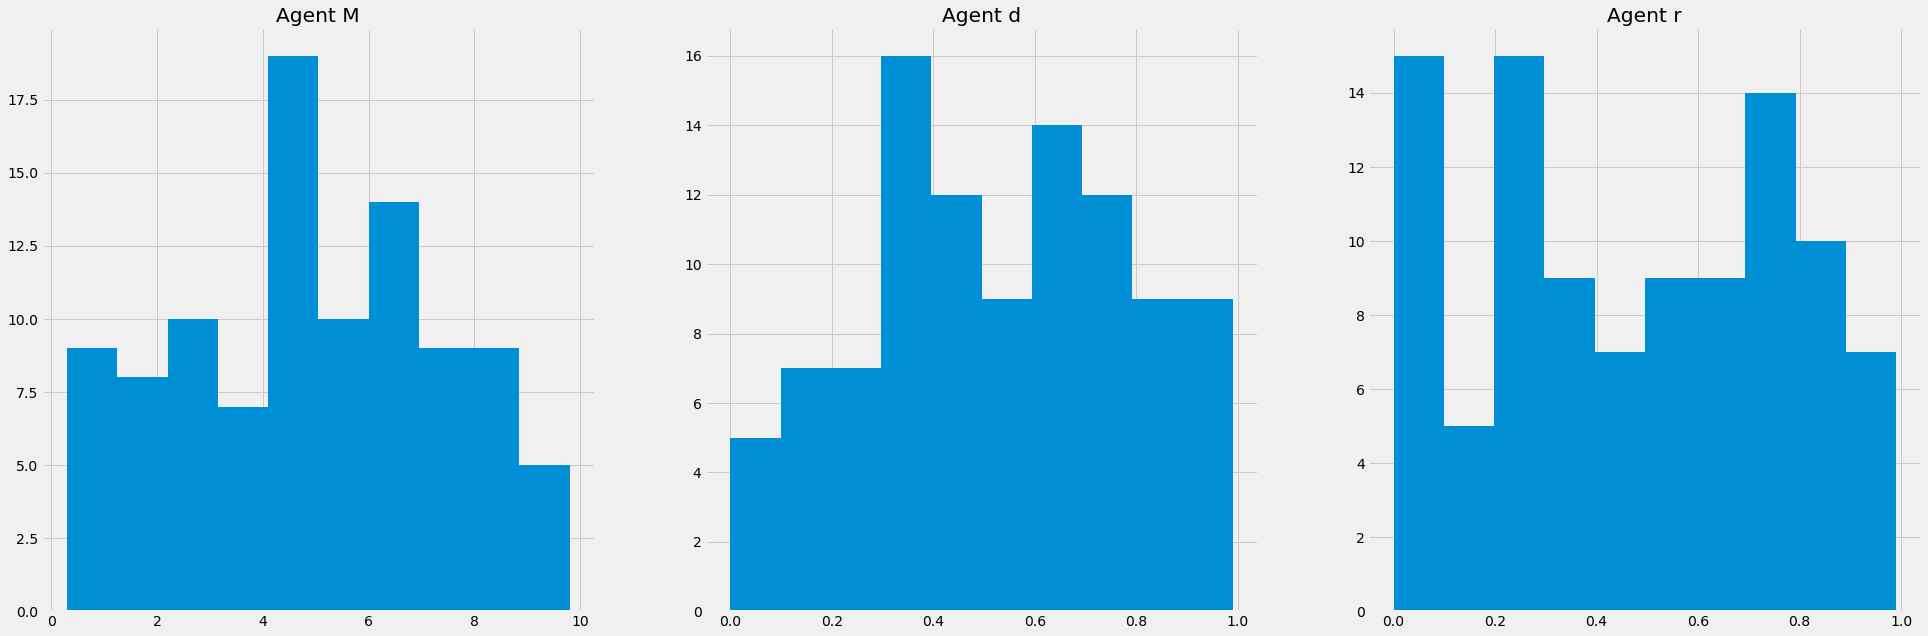

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 6.6, Temptation: 8.1, Sucker: 0, Punishment: 1.5
Agent 1 playing Agent 0: Reward: 6.3, Temptation: 9.2, Sucker: 0, Punishment: 2.9
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 5.5, Temptation: 6.7, Sucker: 0, Punishment: 1.2
Agent 2 playing Agent 0: Reward: 1.9, Temptation: 3.1, Sucker: 0, Punishment: 1.2
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 6.3, Temptation: 7.7, Sucker: 0, Punishment: 1.4
Agent 3 playing Agent 0: Reward: 3.3, Temptation: 4.3, Sucker: 0, Punishment: 1.0
____________________________________________________________________________________________________
Agent 0 playing Agent 4: Reward: 3.5, Temptation: 4.3, Sucker: 0, Punishment: 0.8
Agent 4 playing Agent 

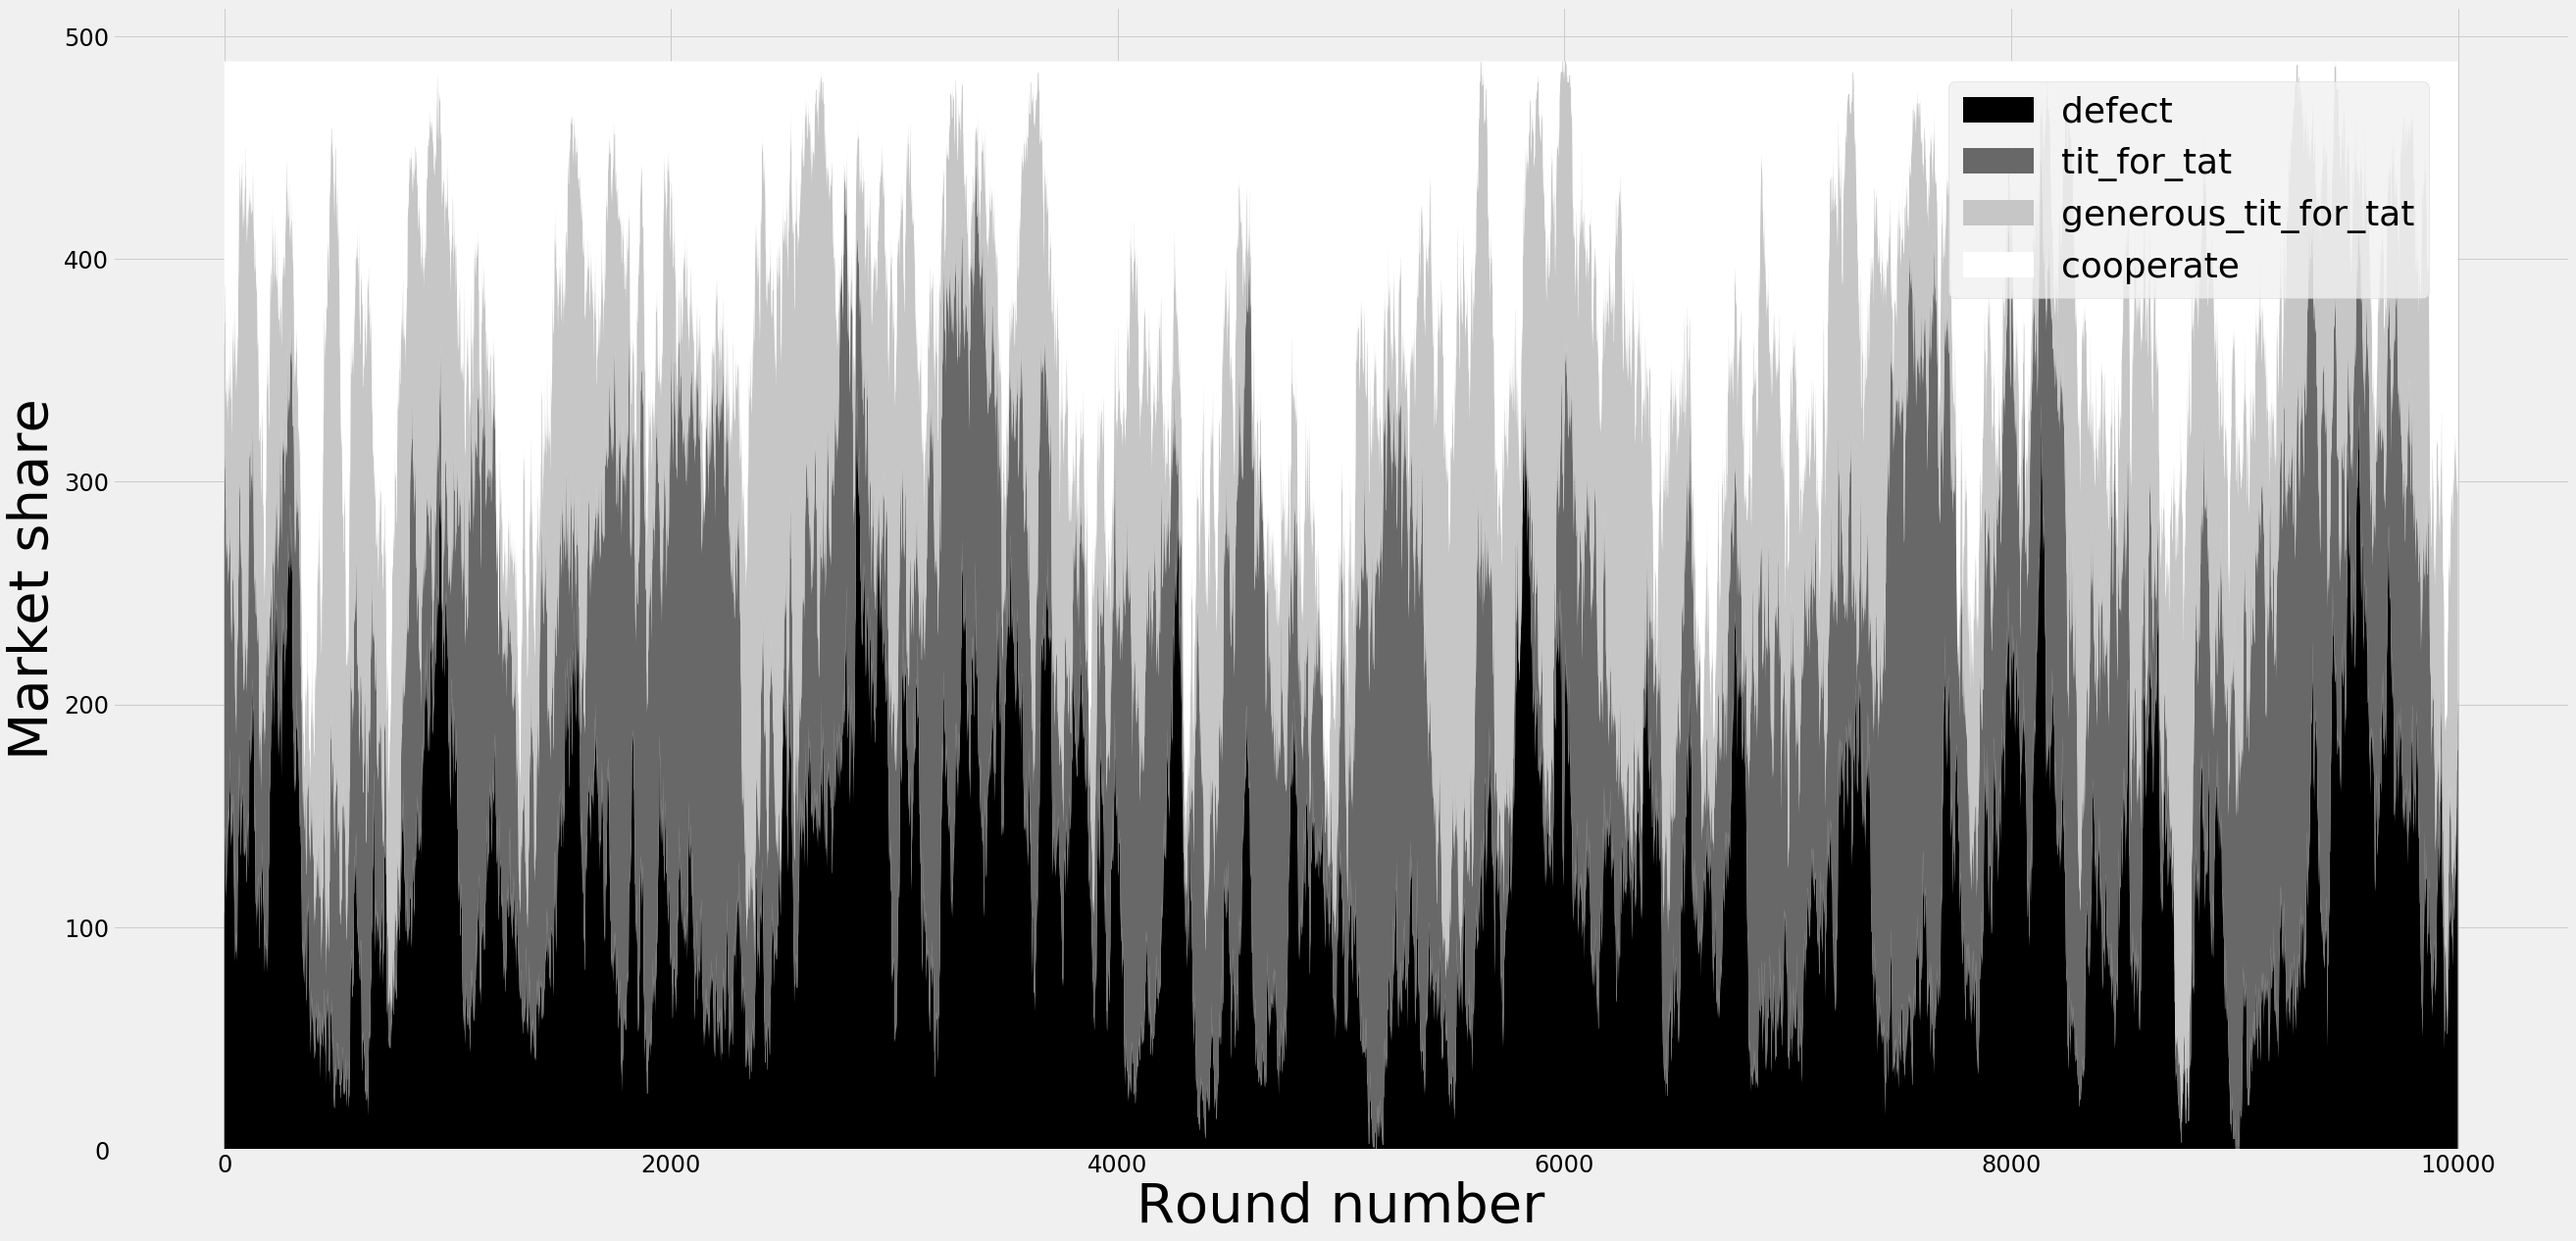

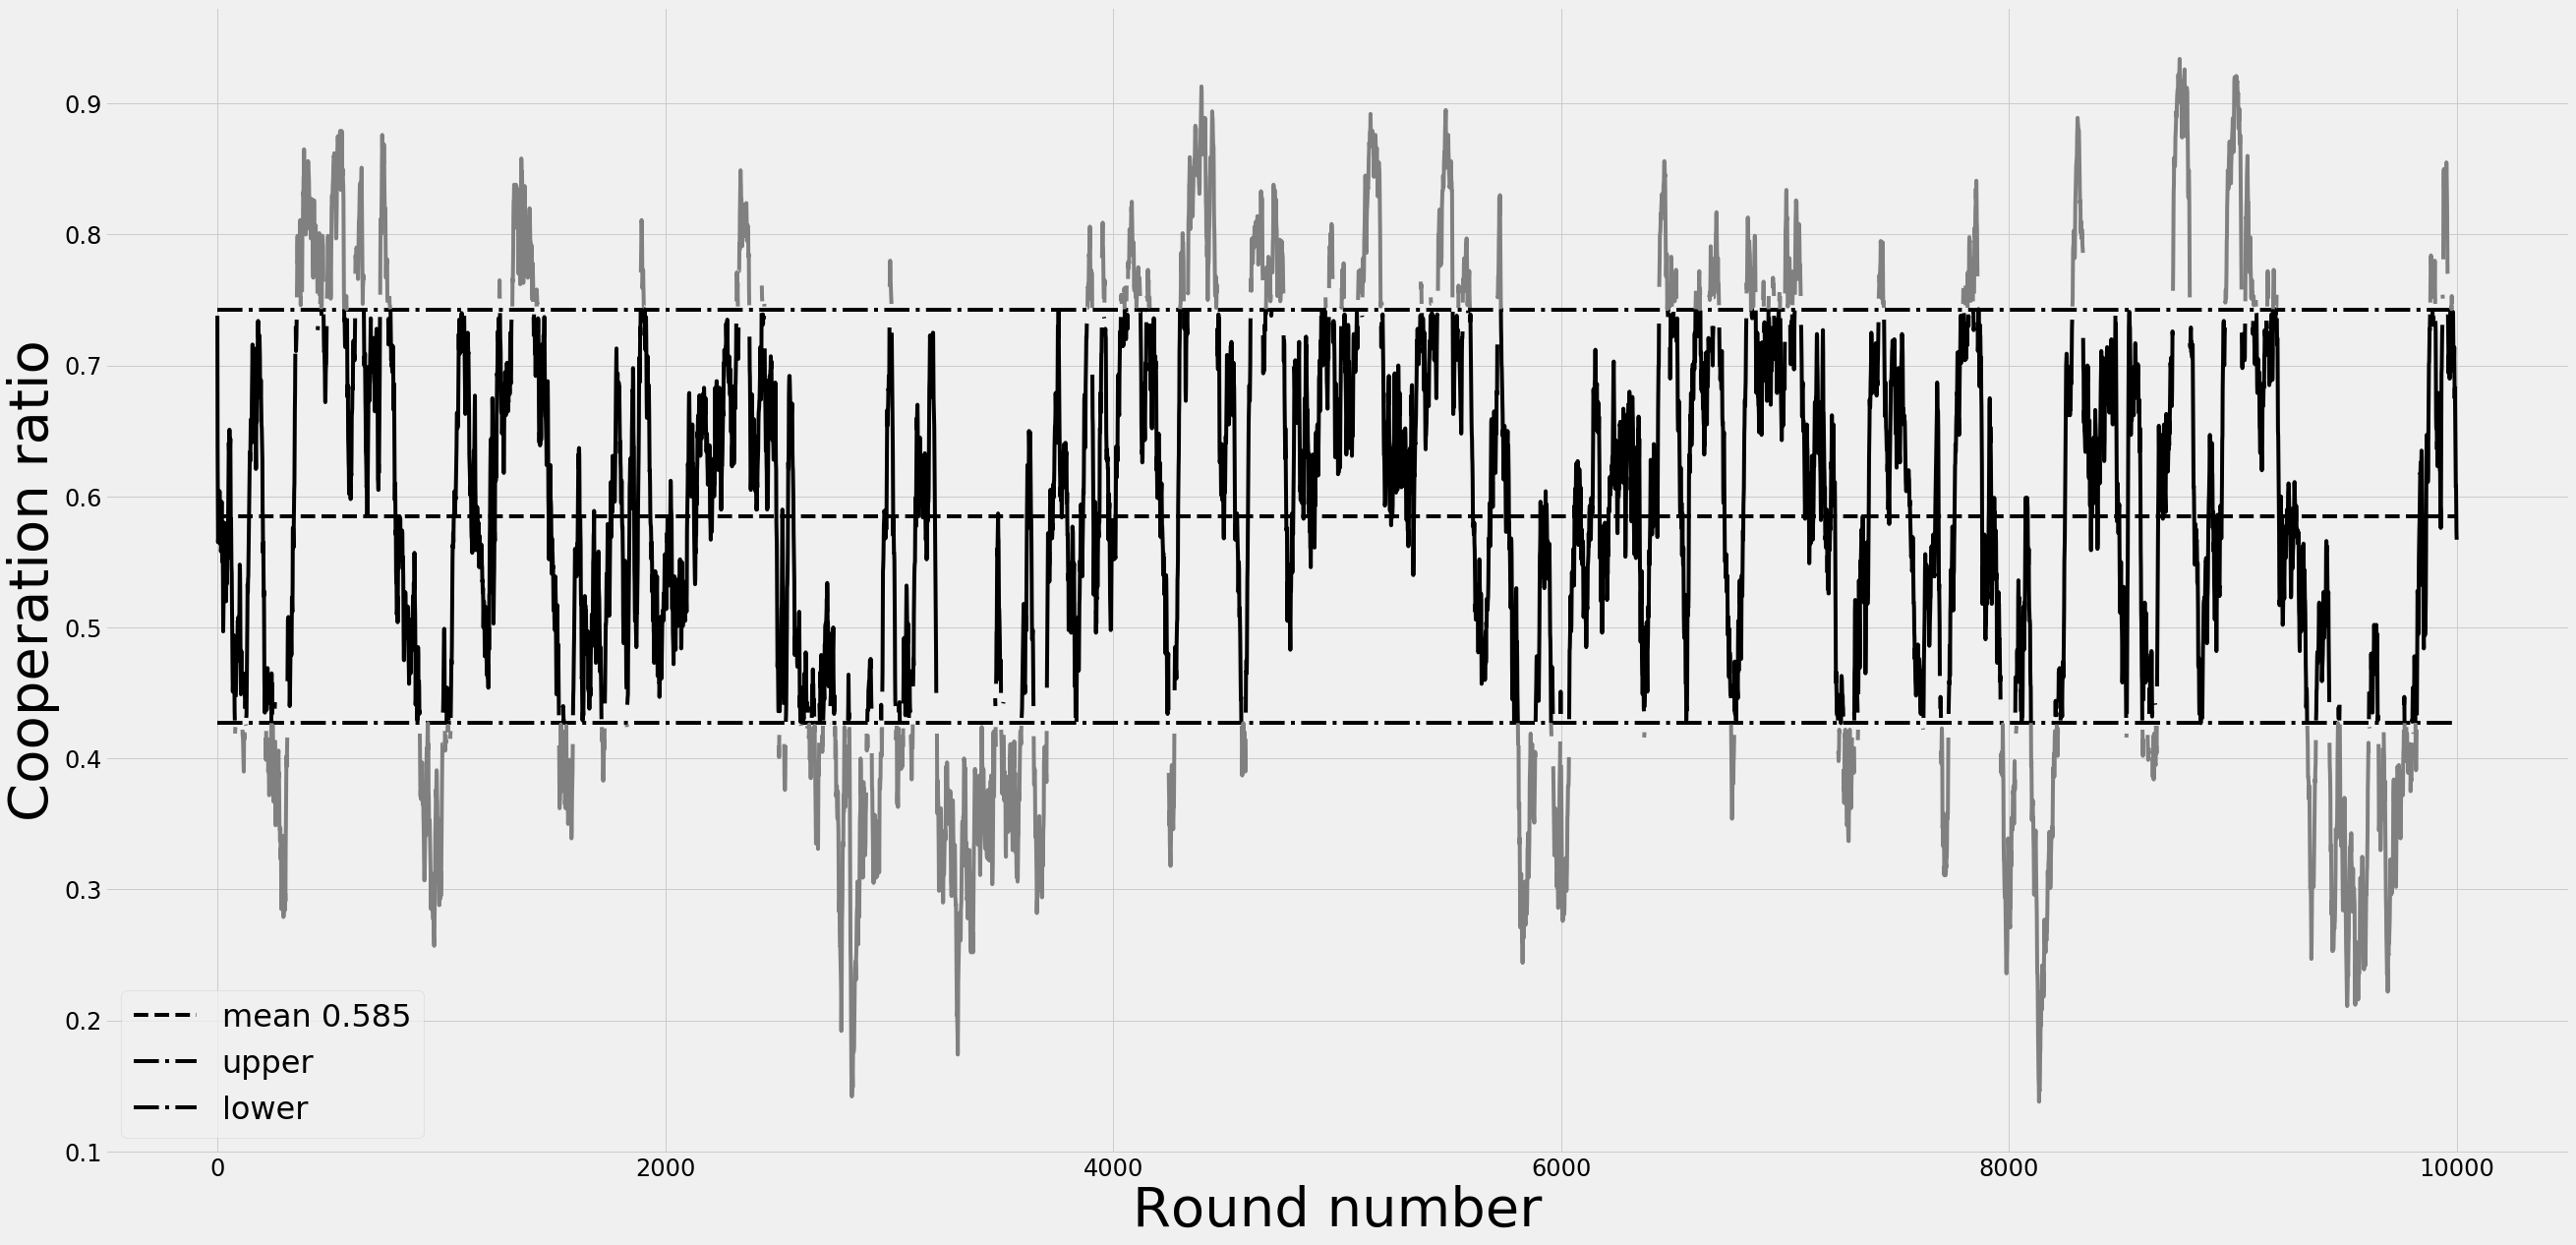

In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 64
np.random.seed(seed)

tour_type = "hetero_mdr_sd_max"
M = [5, 12.5]
R = [0.4, 1.25]
D = [0.3, 1.25]

agents = get_agents(homogenous = False, M = M, R = R, D = D)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("data/outliers/" + str(seed) + "_outlier_counts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, seed = str(seed), tour_type = tour_type)